In [6]:
import nltk
import string
import pandas as pd
import numpy as np
import re
import string
from matplotlib import pyplot as plt
from nltk.stem.porter import *
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
#from textstat.textstat import *

In [7]:
 hate_df = pd.read_csv("dataset/Dataset1_labeled_data.csv")

In [9]:
hate_df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [10]:
hate_df.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

In [6]:
#removed the first column because it didn't provide any information

In [11]:
hate_df = hate_df.drop(columns=['Unnamed: 0'])

In [8]:
hate_df

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...
24778,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,6,0,6,0,1,youu got wild bitches tellin you lies


In [13]:
hate_df.describe()

,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,3.243473,0.280515,2.413711,0.549247,1.110277
std,0.883060,0.631851,1.399459,1.113299,0.462089
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,1.000000
75%,3.000000,0.000000,3.000000,0.000000,1.000000
max,9.000000,7.000000,9.000000,9.000000,2.000000


## describing the columns of the dataset
- count = No of people who annotated each tweet
- hate_speech = No of people who annotated the tweet as hate_speech
- offensive = No of people who annotated the tweet as offensive
- Neither = No. of people who annotated each tweet as neither hate nor offensive
- class = class labels( 0-hate_speech, 1-offensive_language, 2-neither)

In [14]:
hate_df['class'].value_counts() #count of tweets for each class labels

1    19190
2     4163
0     1430
Name: class, dtype: int64

Text(0.5, 1.0, 'Tweet distribution among 3 classes')

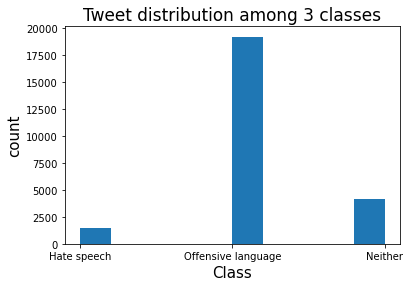

In [16]:
plt.hist(hate_df['class'], align='mid')
plt.ylabel('count', fontsize=15)
col_labels=['Hate speech', 'Offensive language', 'Neither']
x_values=np.arange(0, len(col_labels))
plt.xlabel('Class', fontsize=15)
plt.xticks(x_values, col_labels)
plt.title('Tweet distribution among 3 classes', fontsize=17)

We can see that the offensive class is highly populated compared to the other two classes. This can cause some bias towards the offensive class when later training the model.
One solution would be to balance the dataset using oversampling and undersampling.
I will try that in a later step of the process

# 2. Data Preprocessing 

First I will clean the tweets in the dataset. following operations will be performed in preprocessing step.
- tokenize
- remove stopwords
- stem
- remove URLs
- remove @mention tags
- remove punctutations
- remove numbers
- remove spaces
- lowercase


In [17]:
tweet=hate_df.tweet

In [18]:
tweet

0        !!! RT @mayasolovely: As a woman you shouldn't...
1        !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2        !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3        !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4        !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
                               ...                        
24778    you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779    you've gone and broke the wrong heart baby, an...
24780    young buck wanna eat!!.. dat nigguh like I ain...
24781                youu got wild bitches tellin you lies
24782    ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...
Name: tweet, Length: 24783, dtype: object

In [19]:
#load stopwords
nltk.download('stopwords')
stop_words = stopwords.words("english")
print(stop_words)#print the stopwords list

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


I'll remove some of the words from above stopwords list because they might affect the sentiment of a sentence.

In [58]:
stop_words.remove("not")

In [57]:
stop_words.extend("rt")

In [20]:
stemmer = PorterStemmer()

def preprocess(tweet):
    
    #remove extra spaces
    regex_pattern = re.compile(r'\s+')
    tweet_space_removed = tweet.str.replace(regex_pattern, ' ')
    
    #remove mentions(@)
    regex_patten = re.compile(r'@[\w\-]+')
    tweets = tweet_space_removed.str.replace(regex_patten, '')
    
    #remove URLs
    url_regex = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
                           '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    tweets_new = tweets.str.replace(url_regex, '')
    
    #remove numbers and punctuations
    remove_punc_num = tweets_new.str.replace("[^a-zA-Z]", " ")
    
    #replace whitespaces with space
    newtweet = remove_punc_num.str.replace(r'\s+', ' ')
    
    #remove leading and trailing whitespaces
    newtweet = newtweet.str.replace(r'^\s+|\s+?$','')
    
    #lowercase
    tweets_lower = newtweet.str.lower()
    
    #tokenize
    tokenized_tweet = tweets_lower.apply(lambda x: x.split())
    
    #remove stop words
    tokenized_tweet = tokenized_tweet.apply(lambda x: [item for item in x if item not in stop_words])
    
    #stem the tweet
    tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
    
    for i in range(len(tokenized_tweet)):
        tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
        pre_tweets = tokenized_tweet
        
    return pre_tweets
    
preprocessed_tweets = preprocess(tweet)
    
hate_df['preprocessed_tweets'] = preprocessed_tweets
print(hate_df[["tweet","preprocessed_tweets"]].head(10))


C:\Users\User\AppData\Local\Temp\ipykernel_8136\860942995.py:19: FutureWarning: The default value of regex will change from True to False in a future version.
  remove_punc_num = tweets_new.str.replace("[^a-zA-Z]", " ")
C:\Users\User\AppData\Local\Temp\ipykernel_8136\860942995.py:22: FutureWarning: The default value of regex will change from True to False in a future version.
  newtweet = remove_punc_num.str.replace(r'\s+', ' ')
C:\Users\User\AppData\Local\Temp\ipykernel_8136\860942995.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  newtweet = newtweet.str.replace(r'^\s+|\s+?$','')


                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   
5  !!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just...   
6  !!!!!!"@__BrighterDays: I can not just sit up ...   
7  !!!!&#8220;@selfiequeenbri: cause I'm tired of...   
8  " &amp; you might not get ya bitch back &amp; ...   
9  " @rhythmixx_ :hobbies include: fighting Maria...   

                                 preprocessed_tweets  
0  rt woman complain clean hous amp man alway tak...  
1  rt boy dat cold tyga dwn bad cuffin dat hoe st...  
2   rt dawg rt ever fuck bitch start cri confus shit  
3                                rt look like tranni  
4  rt shit hear might true might faker bitch told ya  
5      shit blow claim faith somebodi still fuck hoe 